In [1]:
# Importing required Libraries

from TFSR_preprocessing import *
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

The data path is: ./train2/


## Obtaining Lables of the Training data

In [2]:
import os
labels = os.listdir("/home/ananya/Deep_RL/cnn-audio/train2")
labels.sort()
print(labels)

['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


## Conversion of .wav files to MFCC

In [3]:
# Sample Size - represents the maximum length 
sample_size = 11
#temp - Number of MFCC Channels
temp = 20

# Save data to array file first
Make_data_matrix(sample_size=11, n_mfcc=20)

up
seven


/home/aniket/Deep_RL/RL_env/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1982
  n_fft, y.shape[-1]


left
two
bed
three
house
nine
off
right
six
eight
sheila
five
on
marvin
zero
bird
tree
four
happy
wow
one
yes
no
stop
go
down
dog
cat


## Split data between training and validation set

In [4]:
# Loading train set and test set
X_train, X_test, y_train, y_test = Get_Data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58248, 20, 11)
(6473, 20, 11)
(58248,)
(6473,)


### Reshape data into 3D vectors so that it can be used in Conv2D layers

In [50]:
# Feature dimension
channels = 1
epochs = 100
batch_size = 100

num_classes = 30

X_train = X_train.reshape(X_train.shape[0], temp, sample_size, channels)
X_test = X_test.reshape(X_test.shape[0], temp, sample_size, channels)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58248, 20, 11, 1)
(6473, 20, 11, 1)
(58248,)
(6473,)


In [52]:
# Generate one-hot encodings for the data
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

### Model 1 - ANN with 5 Dense Layers

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 220)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 128)               28288     
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_79 (Dense)             (None, 30)                3870      
Total params: 81,694
Trainable params: 81,694
Non-trainable params: 0
_________________________________________________

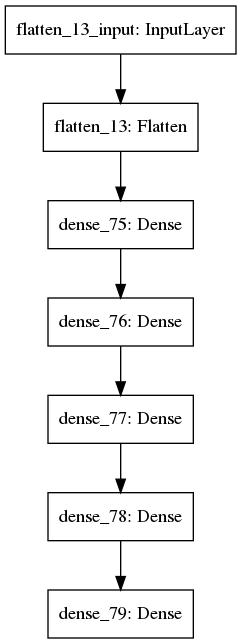

In [59]:
model = Sequential()
model.add(Flatten(input_shape=(temp, sample_size, channels)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
plot_model(model,to_file= "model1.png")

In [10]:
print(X_train.shape)

(58248, 20, 11, 1)


In [11]:
model.fit(X_train, y_train_hot, epochs=30, validation_data=(X_test, y_test_hot))

Epoch 1/30
1821/1821 [==============================] - 11s 3ms/step - loss: 4.4138 - accuracy: 0.1508 - val_loss: 1.7753 - val_accuracy: 0.4658
Epoch 2/30
1821/1821 [==============================] - 4s 2ms/step - loss: 1.6294 - accuracy: 0.5022 - val_loss: 1.3250 - val_accuracy: 0.5932
Epoch 3/30
1821/1821 [==============================] - 4s 2ms/step - loss: 1.2861 - accuracy: 0.6044 - val_loss: 1.2427 - val_accuracy: 0.6277
Epoch 4/30
1821/1821 [==============================] - 4s 2ms/step - loss: 1.1102 - accuracy: 0.6565 - val_loss: 1.1727 - val_accuracy: 0.6470
Epoch 5/30
1821/1821 [==============================] - 4s 2ms/step - loss: 0.9891 - accuracy: 0.6953 - val_loss: 1.1063 - val_accuracy: 0.6726
Epoch 6/30
1821/1821 [==============================] - 4s 2ms/step - loss: 0.9137 - accuracy: 0.7130 - val_loss: 1.0896 - val_accuracy: 0.6830
Epoch 7/30
1821/1821 [==============================] - 4s 2ms/step - loss: 0.8589 - accuracy: 0.7319 - val_loss: 0.9897 - val_accuracy

### MODEL 2 - CNN(1) with 1 Conv2D and 5 Dense Layers

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 18, 9, 32)         320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 4, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               147584    
_________________________________________________________________
dense_59 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_60 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_61 (Dense)             (None, 128)             

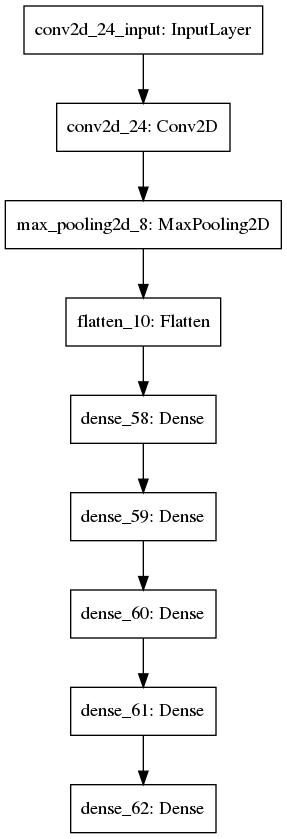

In [55]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(temp, sample_size, channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
plot_model(model,to_file= "model2.png")

In [13]:
model.fit(X_train, y_train_hot, epochs=epochs, validation_data=(X_test, y_test_hot))

Epoch 1/100
1821/1821 [==============================] - 5s 3ms/step - loss: 2.5338 - accuracy: 0.2829 - val_loss: 1.4127 - val_accuracy: 0.5708
Epoch 2/100
1821/1821 [==============================] - 5s 3ms/step - loss: 1.2633 - accuracy: 0.6115 - val_loss: 1.1148 - val_accuracy: 0.6694
Epoch 3/100
1821/1821 [==============================] - 5s 3ms/step - loss: 1.0272 - accuracy: 0.6845 - val_loss: 1.0251 - val_accuracy: 0.6893
Epoch 4/100
1821/1821 [==============================] - 5s 3ms/step - loss: 0.9067 - accuracy: 0.7199 - val_loss: 0.9221 - val_accuracy: 0.7201
Epoch 5/100
1821/1821 [==============================] - 5s 3ms/step - loss: 0.8502 - accuracy: 0.7360 - val_loss: 0.9454 - val_accuracy: 0.7171
Epoch 6/100
1821/1821 [==============================] - 5s 3ms/step - loss: 0.7870 - accuracy: 0.7564 - val_loss: 0.9499 - val_accuracy: 0.7105
Epoch 7/100
1821/1821 [==============================] - 5s 3ms/step - loss: 0.7432 - accuracy: 0.7698 - val_loss: 0.8915 - val_ac

In [16]:
from tensorflow.keras.layers import BatchNormalization

### Model 3 - CNN with 4 Conv2D , 4 Dense and Batch Normalization layers

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 18, 9, 8)          80        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 7, 8)          584       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 5, 32)         2336      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 3, 32)         9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 1, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 1, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 192)             

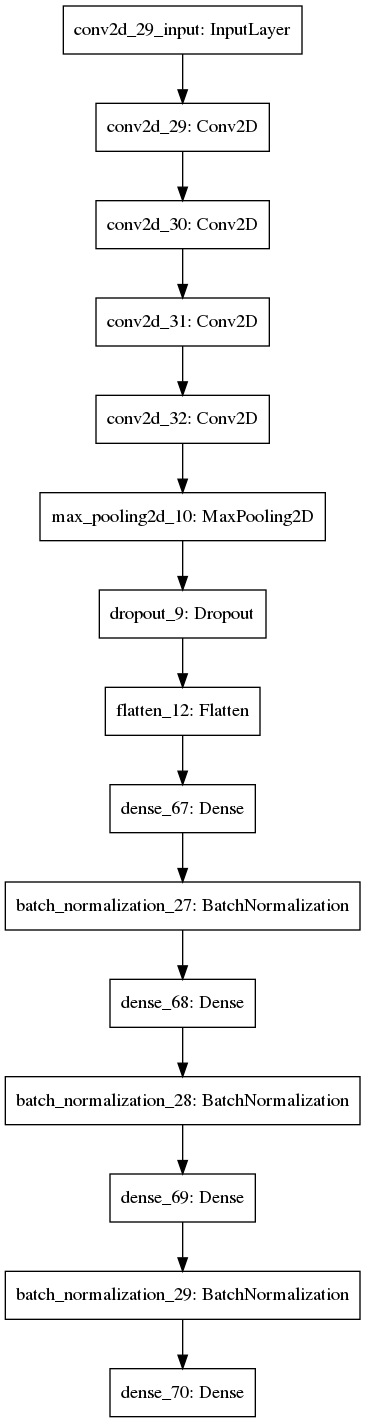

In [57]:
model = Sequential()

model.add(Conv2D(8, (3,3), input_shape=(temp, sample_size, channels), activation='relu'))
model.add(Conv2D(8, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(rate=0.2))

# model.add(Conv2D(16, (3,3), activation='relu'))
# model.add(Conv2D(16, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(rate=0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
plot_model(model,to_file= "model3.png")

In [21]:
model.fit(X_train, y_train_hot, epochs=30, validation_data=(X_test, y_test_hot))

Epoch 1/30
1821/1821 [==============================] - 56s 11ms/step - loss: 3.0161 - accuracy: 0.1672 - val_loss: 1.6243 - val_accuracy: 0.5058
Epoch 2/30
1821/1821 [==============================] - 11s 6ms/step - loss: 1.7547 - accuracy: 0.4684 - val_loss: 1.2379 - val_accuracy: 0.6238
Epoch 3/30
1821/1821 [==============================] - 10s 5ms/step - loss: 1.4354 - accuracy: 0.5654 - val_loss: 1.0479 - val_accuracy: 0.6763
Epoch 4/30
1821/1821 [==============================] - 10s 6ms/step - loss: 1.2635 - accuracy: 0.6148 - val_loss: 0.9685 - val_accuracy: 0.7023
Epoch 5/30
1821/1821 [==============================] - 10s 5ms/step - loss: 1.1686 - accuracy: 0.6438 - val_loss: 0.9229 - val_accuracy: 0.7171
Epoch 6/30
1821/1821 [==============================] - 10s 6ms/step - loss: 1.1032 - accuracy: 0.6623 - val_loss: 0.8952 - val_accuracy: 0.7221
Epoch 7/30
1821/1821 [==============================] - 12s 6ms/step - loss: 1.0527 - accuracy: 0.6725 - val_loss: 0.8254 - val_a

### Import LSTM layer and reshape data to 2D vector  

In [22]:
from tensorflow.keras.layers import LSTM

In [23]:
X_train, X_test, y_train, y_test = get_train_test()

In [24]:
X_train = X_train.reshape(X_train.shape[0], buckets, sample_size)
X_test = X_test.reshape(X_test.shape[0], buckets, sample_size)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(58248, 20, 11)
(6473, 20, 11)
(58248,)
(6473,)


### Model - 4 - LSTM with 1 Layer LSTM and 4 Dense Layers

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 256)               274432    
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
_________________________________________________________________
dense_72 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_31 (Batc (None, 128)               512       
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)             

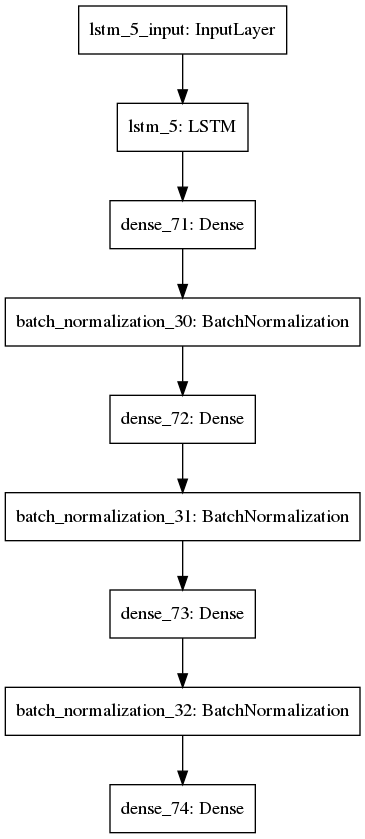

In [58]:
model = Sequential()

model.add(LSTM(256, input_shape=(buckets, sample_size), activation='relu'))

model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
plot_model(model,to_file= "model4.png")

In [33]:
model.fit(X_train, y_train_hot, epochs=10, validation_data=(X_test, y_test_hot))

Epoch 1/10
1821/1821 [==============================] - 38s 20ms/step - loss: 3.5296 - accuracy: 0.0414 - val_loss: 3.4260 - val_accuracy: 0.0445
Epoch 2/10
1821/1821 [==============================] - 37s 21ms/step - loss: 3.3951 - accuracy: 0.0462 - val_loss: 4.5077 - val_accuracy: 0.0496
Epoch 3/10
1821/1821 [==============================] - 37s 20ms/step - loss: 3.2756 - accuracy: 0.0647 - val_loss: 3.4113 - val_accuracy: 0.0521
Epoch 4/10
1821/1821 [==============================] - 38s 21ms/step - loss: 3.2371 - accuracy: 0.0680 - val_loss: 3.4219 - val_accuracy: 0.0422
Epoch 5/10
1821/1821 [==============================] - 38s 21ms/step - loss: 3.3555 - accuracy: 0.0517 - val_loss: 3.3445 - val_accuracy: 0.0542
Epoch 6/10
1821/1821 [==============================] - 38s 21ms/step - loss: 3.1722 - accuracy: 0.0760 - val_loss: 3.6353 - val_accuracy: 0.0304
Epoch 7/10
1821/1821 [==============================] - 38s 21ms/step - loss: 3.3447 - accuracy: 0.0501 - val_loss: 4.0529 -